In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Download latest version
path = kagglehub.dataset_download("ziya07/diabetes-clinical-dataset100k-rows")

print("Path to dataset files:", path)

100%|██████████| 1.56M/1.56M [00:00<00:00, 104MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/diabetes-clinical-dataset100k-rows/versions/1


In [4]:
#load dataset
file_path = '/content/drive/MyDrive/diabetes-clinical-dataset100k-rows.csv'
file_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(file_path)

In [5]:
output_dir = "/content/drive/MyDrive/diabetes_project_graphs"
os.makedirs(output_dir, exist_ok=True)

In [6]:
#basic info
print("Shape:", df.shape)
print(df.head())

Shape: (100000, 17)
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  \
0           never  27.32          5.

In [14]:
#check for missing values
df.isna().sum()

,0
year,0
gender,0
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


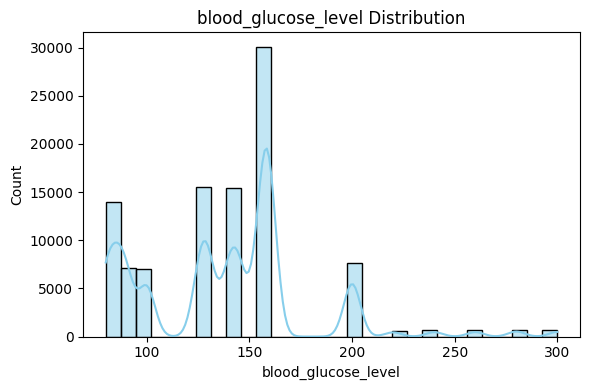

blood_glucose_level: mean=138.06, median=140.00, std=40.71


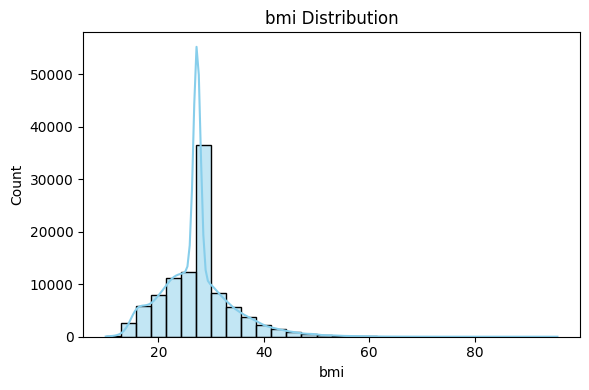

bmi: mean=27.32, median=27.32, std=6.64


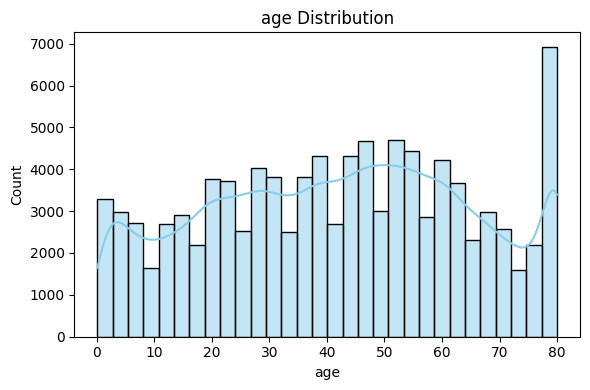

age: mean=41.89, median=43.00, std=22.52


In [7]:
num_vars = ['blood_glucose_level', 'bmi', 'age']

for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{col}_distribution.png")
    plt.show()

    print(f"{col}: mean={df[col].mean():.2f}, median={df[col].median():.2f}, std={df[col].std():.2f}")


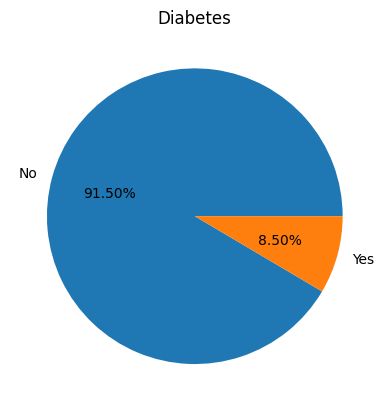

In [8]:
#️️ Diabetes (Binary Variable)
plt.title('Diabetes')
plt.pie(df['diabetes'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()



/tmp/ipython-input-2845670774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['No Hypertension', 'Hypertension'],


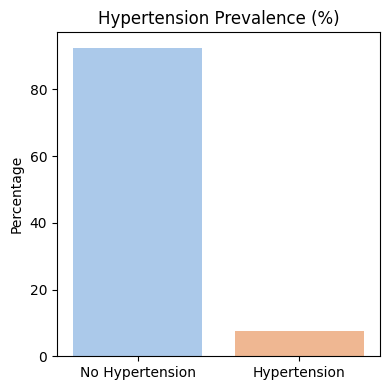

Hypertension prevalence: 7.49%


/tmp/ipython-input-2845670774.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['No heart_disease', 'heart_disease'],


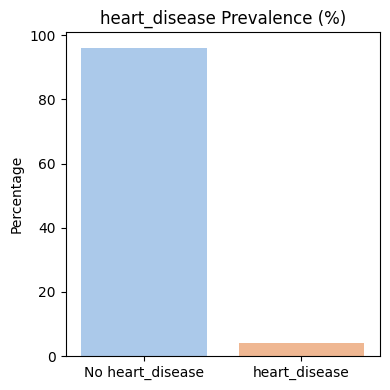

heart_disease prevalence: 3.94%


/tmp/ipython-input-2845670774.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['No diabetes', 'diabetes'],


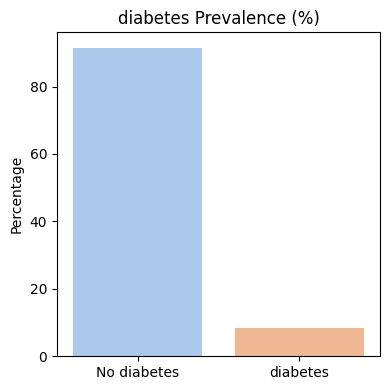

diabetes prevalence: 8.50%


In [9]:
#️️ Hypertension (Binary Variable)
if 'hypertension' in df.columns:
    hypertension_rate = df['hypertension'].mean() * 100
    plt.figure(figsize=(4,4))
    sns.barplot(x=['No Hypertension', 'Hypertension'],
                y=[100-hypertension_rate, hypertension_rate],
                palette='pastel')
    plt.title('Hypertension Prevalence (%)')
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/hypertension_prevalence.png")
    plt.show()

    print(f"Hypertension prevalence: {hypertension_rate:.2f}%")

  # Heart disease
    if 'heart_disease' in df.columns:
      heart_disease_rate = df['heart_disease'].mean() * 100
      plt.figure(figsize=(4,4))
      sns.barplot(x=['No heart_disease', 'heart_disease'],
                y=[100-heart_disease_rate, heart_disease_rate],
                palette='pastel')
      plt.title('heart_disease Prevalence (%)')
      plt.ylabel('Percentage')
      plt.tight_layout()
      plt.savefig(f"{output_dir}/heart_disease_prevalence.png")
      plt.show()

    print(f"heart_disease prevalence: {heart_disease_rate:.2f}%")


  # Diabetes
    if 'diabetes' in df.columns:
      diabetes_rate = df['diabetes'].mean() * 100
      plt.figure(figsize=(4,4))
      sns.barplot(x=['No diabetes', 'diabetes'],
                y=[100-diabetes_rate, diabetes_rate],
                palette='pastel')
      plt.title('diabetes Prevalence (%)')
      plt.ylabel('Percentage')
      plt.tight_layout()
      plt.savefig(f"{output_dir}/diabetes_prevalence.png")
      plt.show()

    print(f"diabetes prevalence: {diabetes_rate:.2f}%")

/tmp/ipython-input-1679687749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='light:m_r')


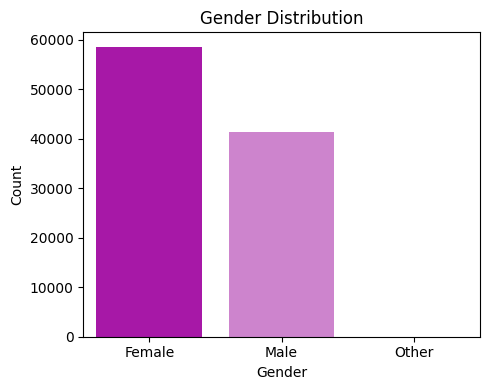

In [10]:
# Gender
plt.figure(figsize=(5,4))
sns.countplot(x='gender', data=df, palette='light:m_r')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f"{output_dir}/gender_distribution.png")
plt.show()

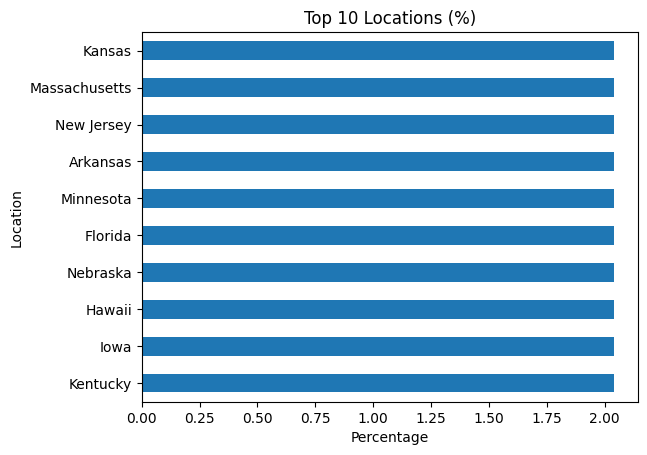

In [11]:
location_counts = df['location'].value_counts()
location_percent = (location_counts / len(df)) * 100

# Combine into one DataFrame
location_stats = pd.DataFrame({
    'Count': location_counts,
    'Percentage': location_percent.round(2)
})
location_stats.head(10).plot(
    kind='barh', y='Percentage', legend=False,
    title='Top 10 Locations (%)'
)
plt.xlabel('Percentage')
plt.ylabel('Location')
plt.show()


/tmp/ipython-input-4255616594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_perc.index, y=race_perc.values, palette='pastel')


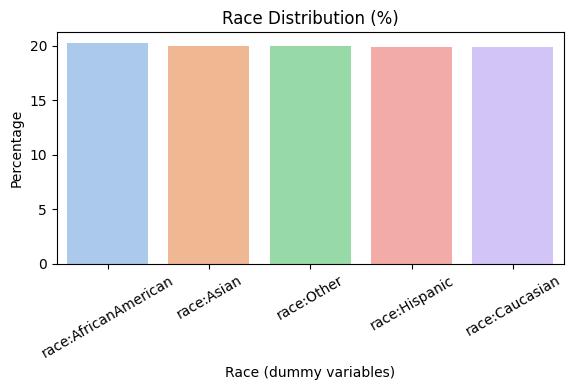


Race composition (%):
race:AfricanAmerican    20.22
race:Asian              20.02
race:Other              20.00
race:Hispanic           19.89
race:Caucasian          19.88
dtype: float64
✅ All figures saved to: /content/drive/MyDrive/diabetes_project_graphs


In [12]:
race_cols = [c for c in df.columns if c.startswith('race:')]
if race_cols:
    race_perc = (df[race_cols].sum() / len(df) * 100).sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    sns.barplot(x=race_perc.index, y=race_perc.values, palette='pastel')
    plt.title('Race Distribution (%)')
    plt.xlabel('Race (dummy variables)')
    plt.ylabel('Percentage')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/race_distribution.png")
    plt.show()

    print("\nRace composition (%):")
    print(race_perc.round(2))

print(f"✅ All figures saved to: {output_dir}")

In [13]:
# Relationship with diabetes (target)

